In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Basic Graph

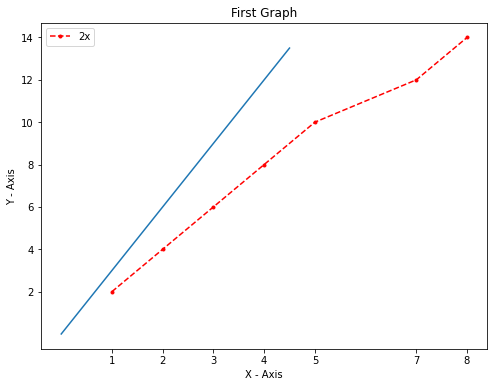

In [21]:
x = [1,2,3,4,5,7,8]
y = [2,4,6,8,10,12,14]
#plt.plot(x,y, label='2x', color='red', linewidth='2', marker='x')

plt.figure(figsize=(8,6))

plt.plot(x, y, 'r.--', label='2x')

# 2nd line
x2 = np.arange(0,5,0.5)
plt.plot(x2, x2*3)


plt.title('First Graph')
plt.xlabel('X - Axis')
plt.ylabel('Y - Axis')
plt.xticks(x)
plt.yticks(y)
plt.legend()
plt.savefig('mygraph.png', dpi=100)
plt.show()

### Bar Chart

No handles with labels found to put in legend.


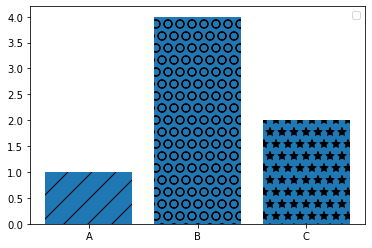

In [32]:
labels = ['A', 'B', 'C']
values = [1,4,2]
plt.figure(figsize=(6,4))

bars = plt.bar(labels, values)
patterns = ['/', 'O', '*']

for bar in bars:
    bar.set_hatch(patterns.pop(0))

#bars[0].set_hatch('/')
#bars[1].set_hatch('O')
#bars[2].set_hatch('*')


plt.legend()

plt.show()

### Real world Examples

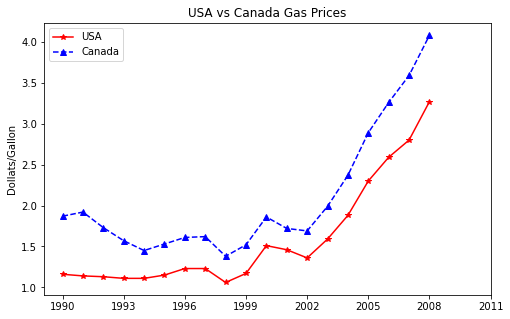

In [34]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8,5))

plt.plot(gas.Year, gas.USA, 'r-*', label = 'USA')
plt.plot(gas.Year, gas.Canada, 'b--^', label = 'Canada')

plt.title('USA vs Canada Gas Prices')
plt.ylabel('Dollats/Gallon')
plt.legend()

plt.xticks(gas.Year[::3].tolist()+[2011])

plt.show()

### Matplot Basics

Text(0, 0.5, 'Weight')

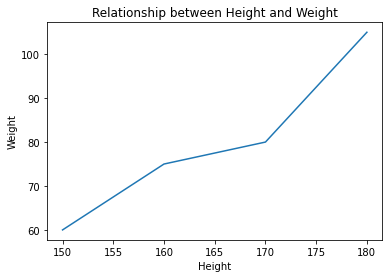

In [7]:
height = [150, 160, 170, 180]
weight = [60, 75, 80, 105]

plt.plot(height, weight)
plt.title('Relationship between Height and Weight')
plt.xlabel('Height')
plt.ylabel('Weight')

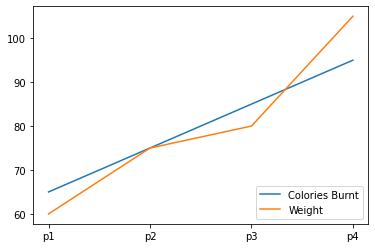

In [14]:
colories_burnt = [65, 75, 85, 95]
plt.plot(colories_burnt)
plt.plot(weight)
plt.legend(labels=['Colories Burnt', 'Weight'], loc = 'lower right')
plt.xticks(ticks=[0,1,2,3], labels=['p1', 'p2', 'p3', 'p4'])
plt.show()

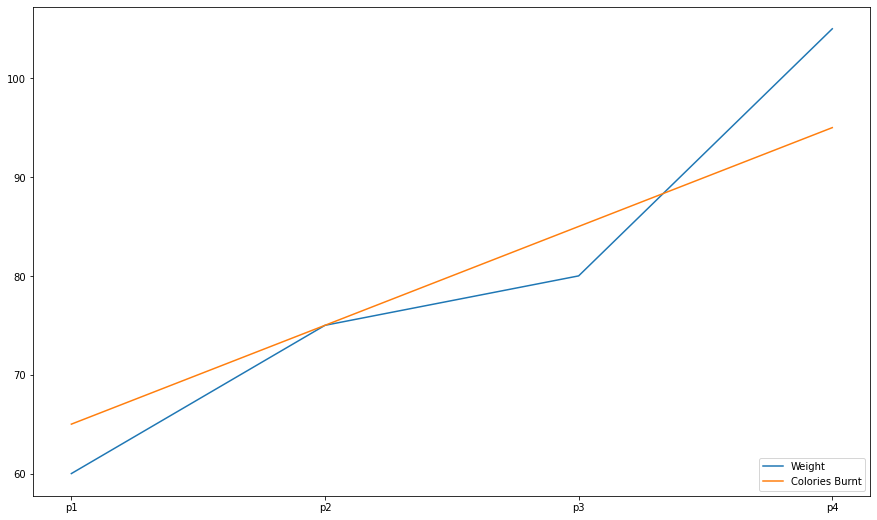

In [18]:
plt.figure(figsize=(15, 9))
plt.plot(weight)
plt.plot(colories_burnt)
plt.legend(labels=['Weight', 'Colories Burnt'], loc = 'lower right')
plt.xticks(ticks=[0,1,2,3], labels=['p1','p2','p3','p4'])
plt.show()

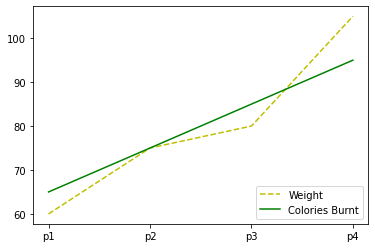

In [25]:
plt.plot(weight, 'y--')
plt.plot(colories_burnt, 'g')
plt.legend(labels=['Weight', 'Colories Burnt'], loc = 'lower right')
plt.xticks(ticks=[0,1,2,3], labels=['p1','p2','p3','p4'])
plt.show()

[Text(0, 0, 'p1'), Text(1, 0, 'p2'), Text(2, 0, 'p3'), Text(3, 0, 'p4')]

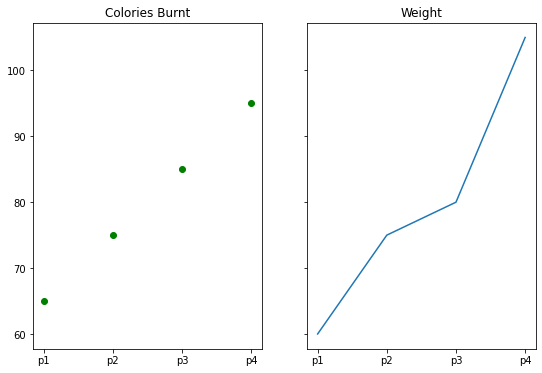

In [30]:
### Creating subplots

# create 2 plots 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,6), sharey=True)

# plot on (0, 0) row and column  
ax[0].plot(colories_burnt, 'go')

# plot on (0, 1) row and column  
ax[1].plot(weight)

# Set the title for the subplots
ax[0].set_title('Colories Burnt')
ax[1].set_title('Weight')

# set ticks for subplots
ax[0].set_xticks(ticks=[0,1,2,3])
ax[1].set_xticks(ticks=[0,1,2,3])

ax[0].set_xticklabels(labels=['p1','p2','p3','p4'])
ax[1].set_xticklabels(labels=['p1','p2','p3','p4'])


In [32]:
data = pd.read_csv('bigmart_data.csv')
data = data.dropna(how='any')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [33]:
price_by_item = data.groupby('Item_Type').Item_MRP.mean()[:10]
price_by_item

Item_Type
Baking Goods             125.795653
Breads                   141.300639
Breakfast                134.090683
Canned                   138.551179
Dairy                    149.481471
Frozen Foods             140.095830
Fruits and Vegetables    145.418257
Hard Drinks              140.102908
Health and Hygiene       131.437324
Household                149.884244
Name: Item_MRP, dtype: float64

### 1. Line Chart

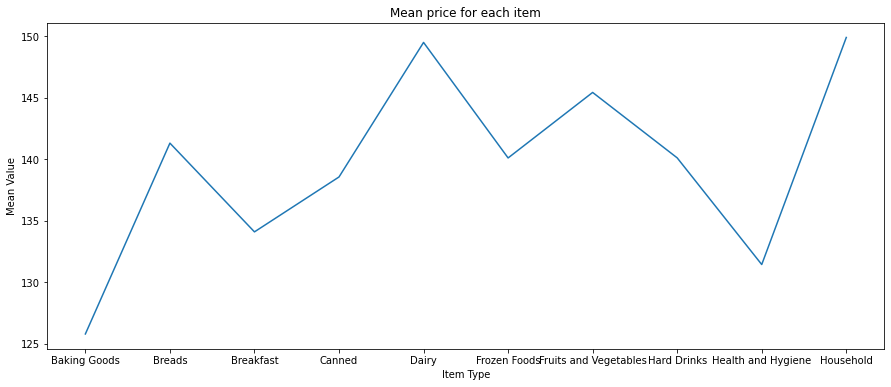

In [36]:
x = price_by_item.index.tolist()
y = price_by_item.values.tolist()

plt.figure(figsize=(15,6))

plt.title('Mean price for each item')

plt.xlabel('Item Type')
plt.ylabel('Mean Value')

plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.plot(x,y)
plt.show()

### 2. Bar Chart

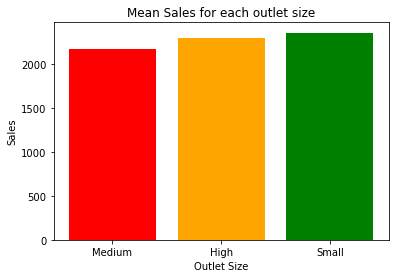

In [39]:
# Sales by outlet size
sales_by_outlet_size = data.groupby('Outlet_Size').Item_Outlet_Sales.mean()

# sort by sales
sales_by_outlet_size.sort_values(inplace=True)

x = sales_by_outlet_size.index.tolist()
y = sales_by_outlet_size.values.tolist()

# set axis labels
plt.xlabel('Outlet Size')
plt.ylabel('Sales')

# Set the title
plt.title('Mean Sales for each outlet size')

# Set xticks
plt.xticks(labels=x, ticks = np.arange(len(x)))

plt.bar(x, y, color=['red', 'orange', 'green'])
plt.show()

### Histogram

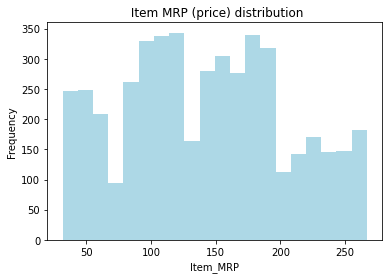

In [41]:
plt.title(' Item MRP (price) distribution')

plt.xlabel('Item_MRP')
plt.ylabel('Frequency')

plt.hist(data['Item_MRP'], bins=20, color='lightblue')
plt.show()

### 4. Boxplot

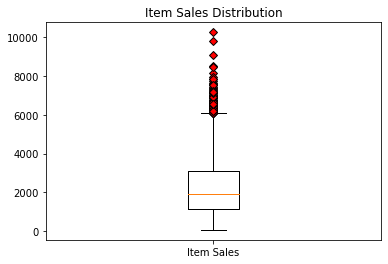

In [43]:
# Boxplot helps to identify the outliers easily

data_sales = data[['Item_Outlet_Sales']]
red_diamond = dict(markerfacecolor='r', marker='D')

plt.title('Item Sales Distribution')

plt.boxplot(data_sales.values, labels=['Item Sales'], flierprops=red_diamond)
plt.show()

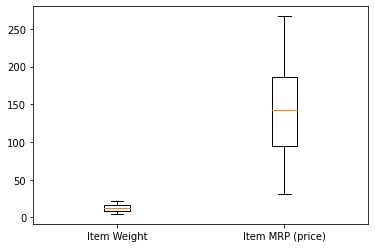

In [45]:
data_sales = data[['Item_Weight', 'Item_MRP']]

red_diamond = dict(markerfacecolor = 'r', marker='D')
fig, ax = plt.subplots()
plt.boxplot(data_sales.values, labels=['Item Weight', 'Item MRP (price)'])
plt.show()

### 5. Violin Plot

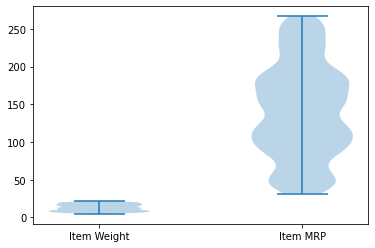

In [48]:
data_sales = data[['Item_Weight', 'Item_MRP']]

fig, ax = plt.subplots()
plt.xticks(ticks=[1,2], labels=['Item Weight', 'Item MRP'])
plt.violinplot(data_sales.values)
plt.show()

### 6. Scatter Plot

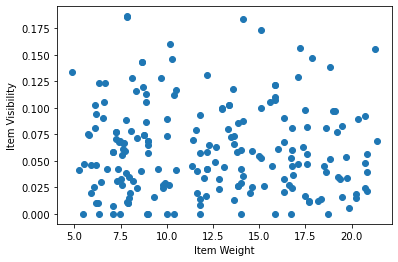

In [49]:
plt.xlabel('Item Weight')
plt.ylabel('Item Visibility')

plt.scatter(data['Item_Weight'][:200], data['Item_Visibility'][:200])
plt.show()

### 7. Bubble Plot

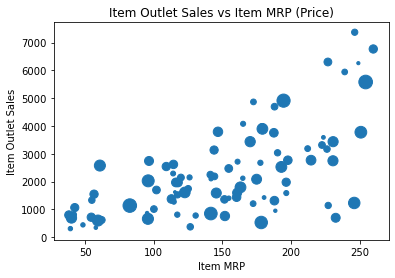

In [50]:
# Help to analyze three variables in same go

plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

plt.title('Item Outlet Sales vs Item MRP (Price)')

plt.scatter(data['Item_MRP'][:100], data['Item_Outlet_Sales'][:100], data['Item_Visibility'][:100]*1000)
plt.show()